In [2]:
# importa, seta configuracao, le arquivo e tira colunas 'unnamed'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from pandas.plotting import parallel_coordinates
from sklearn.manifold import TSNE

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df = pd.read_csv('dados_filtrados_v4_cotistas.csv')

In [18]:
df0 = pd.read_csv('dados_filtrados_v4_cotistas_0.csv')
df1 = pd.read_csv('dados_filtrados_v4_cotistas_1.csv')
df2 = pd.read_csv('dados_filtrados_v4_cotistas_2.csv')
df3 = pd.read_csv('dados_filtrados_v4_cotistas_3.csv')
df4 = pd.read_csv('dados_filtrados_v4_cotistas_4.csv')
df5 = pd.read_csv('dados_filtrados_v4_cotistas_5.csv')

In [6]:
a = df.drop(['Data de Nascimento'], axis=1)
X = a.values
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded

array([[ 34.090553,  66.51064 ],
       [ 79.45627 , -39.52571 ],
       [ 79.65387 , -39.705368],
       ...,
       [ 78.867386, -14.290981],
       [  9.034713,  38.731873],
       [  8.916895,  38.729015]], dtype=float32)

In [12]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

In [15]:
a.columns

Index(['ID Aluno', 'Sexo', 'Cotista', 'Tipo de Escola', 'Raça', 'Curso', 'Período de Ingresso na Unb', 'Período de saída da opção', 'Ano e Semestre', 'Média do período', 'Créditos cursados no total', 'Créditos cursados no semestre(com aprovação)', 'Código da disciplina', 'Créditos disciplina', 'Menção na disciplina', 'semestre', 'idade', 'saiu'], dtype='object')

In [25]:
def plotDataframe(a, X_embedded, currentLabel = 'Raça'):
    data = a
    Y_sklearn = X_embedded
    y = data[currentLabel].values
    numColors = len(data[currentLabel].unique())

    cmap = get_cmap(numColors+1)
    colorList = [cmap(i) for i in range(1, numColors+1)]


    with plt.style.context('seaborn-whitegrid'):
        plt.figure(figsize=(15, 10))
        for lab, col in zip(data[currentLabel].unique(),
                            colorList):
            plt.scatter(Y_sklearn[y==lab, 0],
                        Y_sklearn[y==lab, 1],
                        label=lab,
                        c=col)
        plt.xlabel('X Axis')
        plt.ylabel('Y Axis')
        plt.legend(loc='lower right')
        plt.tight_layout()
        plt.show()

    plt.show()

In [20]:
a = df0.drop(['Data de Nascimento'], axis=1)
X = a.values
X_embedded = TSNE(n_components=2, n_iter=2000).fit_transform(X)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


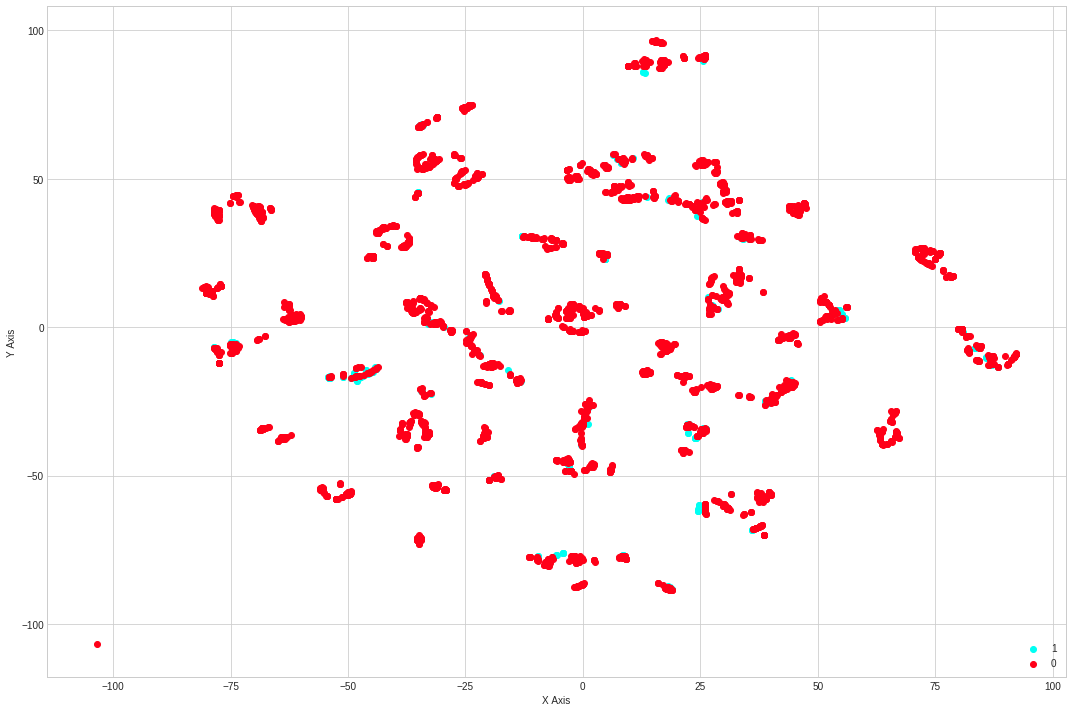

In [30]:
plotDataframe(a, X_embedded, 'Sexo')